# Hydrogen and Helium Ionization

Figure 4.5 from Chapter 4 of Stellar Structure & Evolution Pinsonneault & Ryden, Cambridge University Press.

Hydrogen and Helium ionization state and adiabatic index (2 panels).

Data are calculated numerically by B. Ryden for the case of $\rho$=10$^{-7}$ g cm$^{-3}$ and pure H and He in
near-solar fractions of X=0.72 and Y=0.28.

In [1]:
%matplotlib inline

import os, sys, math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.

In [2]:
plotFile = 'Fig4_5.png' 

# graphic aspect ratio = width/height

aspect = 2.4

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 12
labelFontSize = 8
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)
    
# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Plot Figure 4.4, 2 panels

Linear in vertical axis, log10(T) on the horizontal axis.  Left: ionization state vs. temperature, 
Right: adiabatic index vs temperature.

Lines in left panel:
 * solid H+
 * dotted He+
 * dashed He++


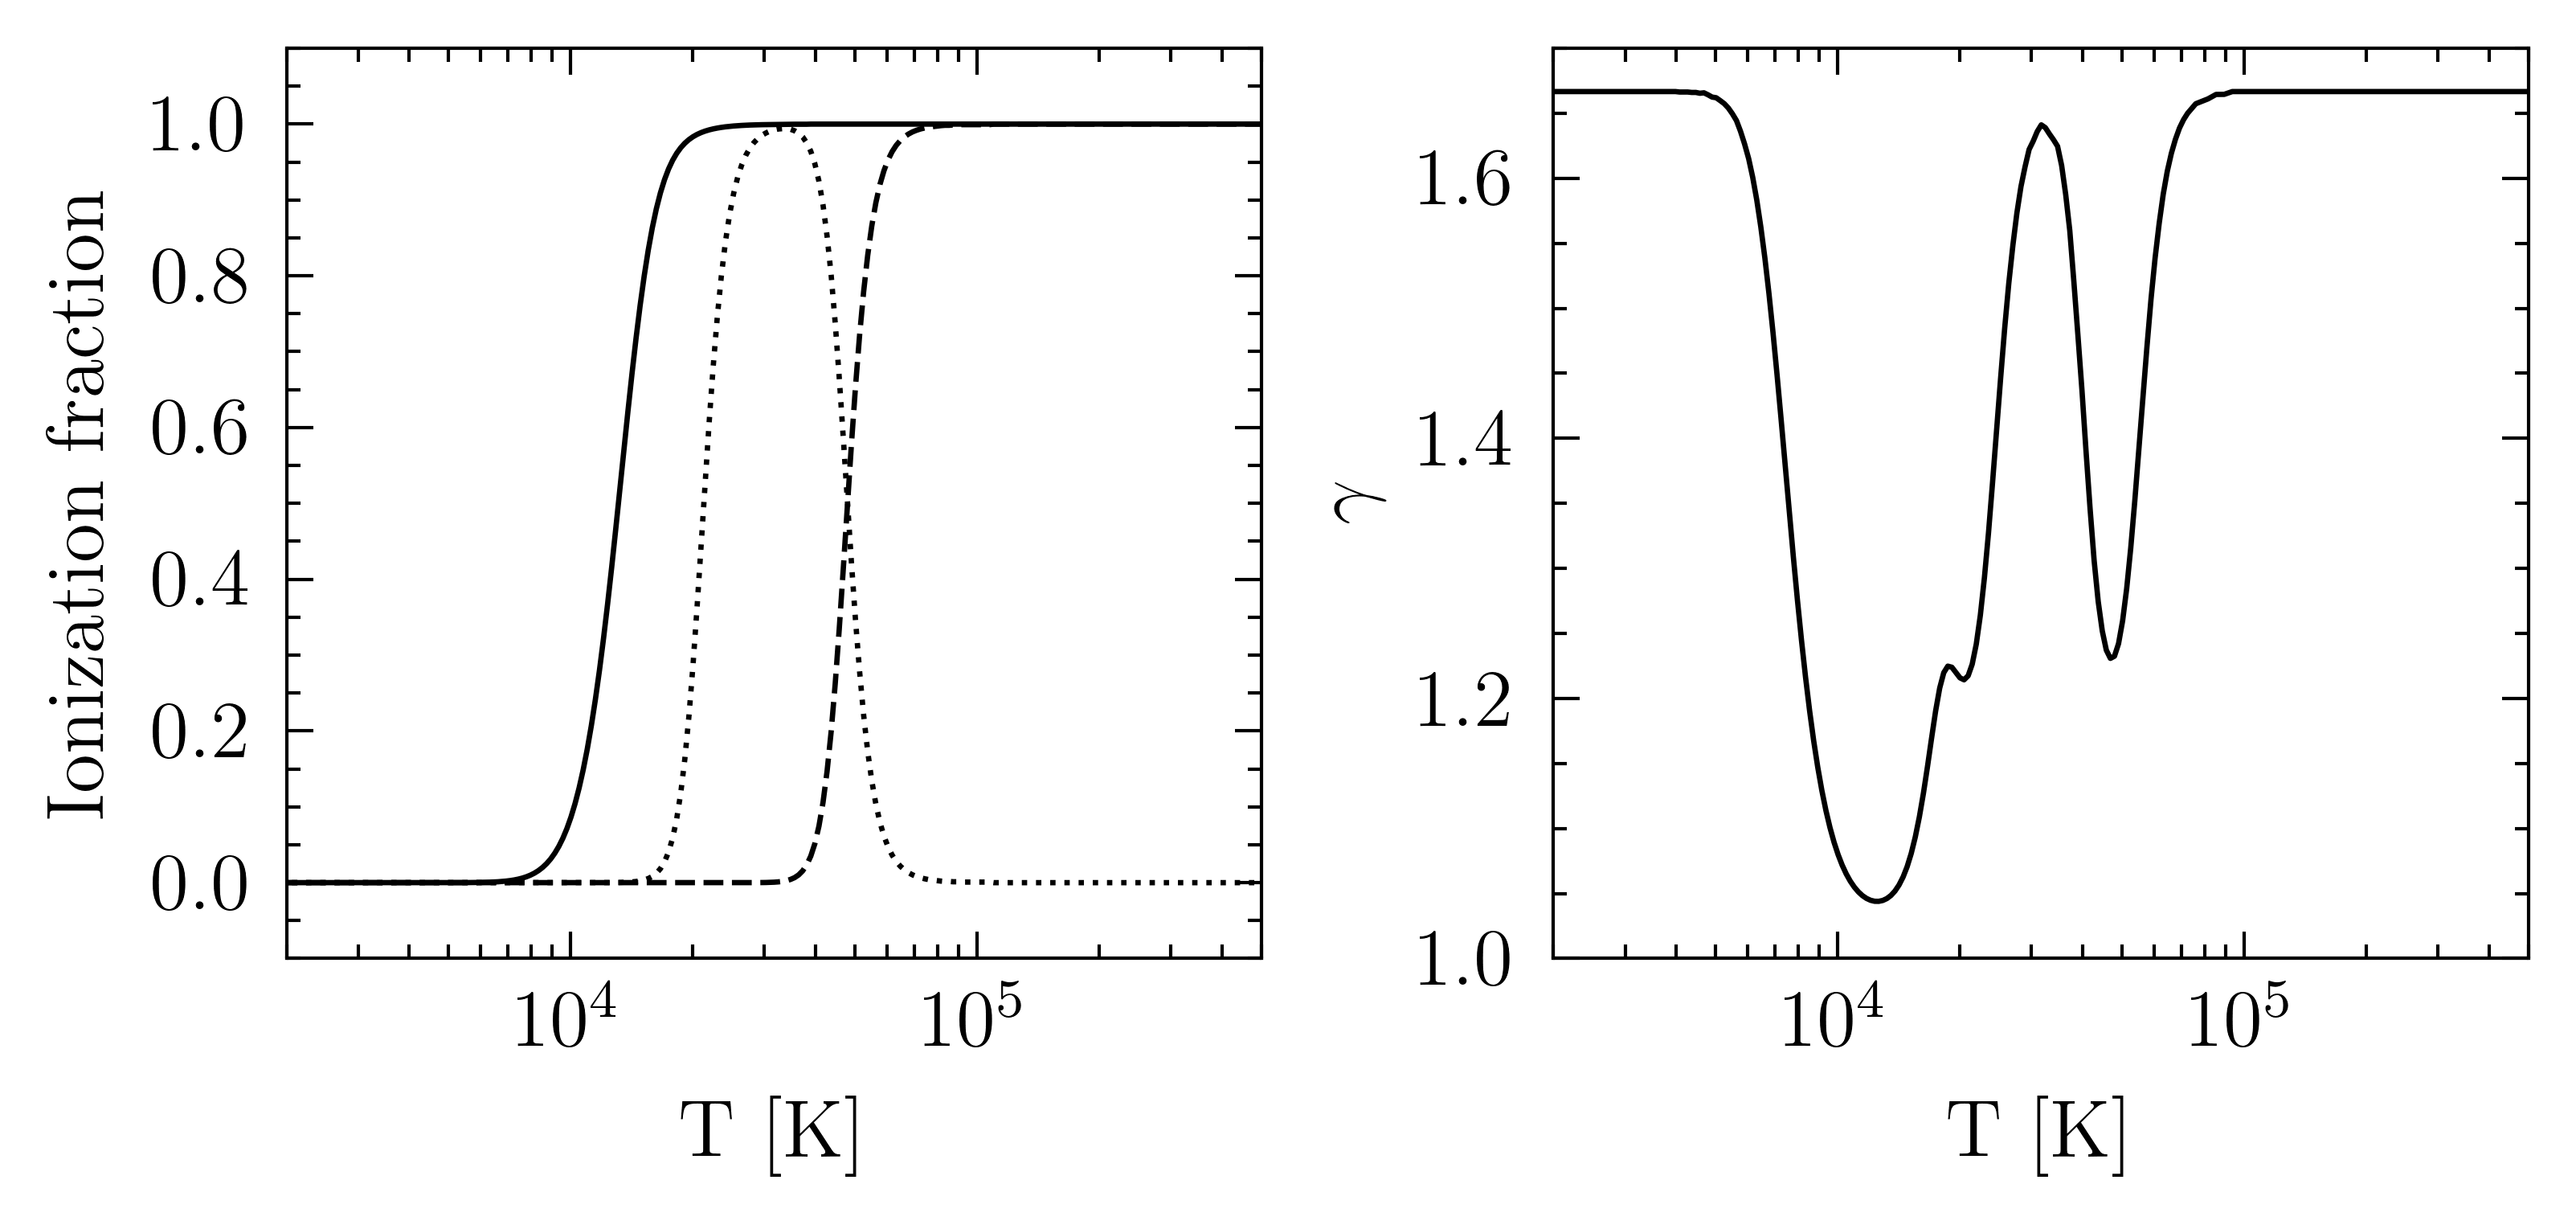

In [3]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(wInches,hInches),dpi=dpi)

fig.subplots_adjust(wspace=0.3, hspace=0)

# Left Panel: Ionization vs T

dataFile = 'HHe_IonFraction.txt'

data = pd.read_csv(dataFile,sep=r'\s+',comment='#')
T = np.array(data['Temp'])
fHP = np.array(data['Hfrac'])
fHeP = np.array(data['He1frac'])
fHe2P = np.array(data['He2frac'])

# Plot Limits

minT = 2000.
maxT = 500000.
minY = -0.1
maxY = 1.1

ax1.tick_params('both',length=4,width=lwidth,which='major',direction='in',top='on',right='on')
ax1.tick_params('both',length=2,width=lwidth,which='minor',direction='in',top='on',right='on')
ax1.set_xlim(minT,maxT)
ax1.set_xlabel(r'T [K]',fontsize=axisFontSize)
ax1.set_xscale('log')
ax1.xaxis.set_major_locator(LogLocator(base=10.0,subs=(1.0,),numticks=100))
ax1.xaxis.set_minor_locator(LogLocator(base=10.0,subs=np.arange(2,10)*0.1,numticks=100))
ax1.xaxis.set_minor_formatter(NullFormatter())
ax1.set_ylim(minY,maxY)
ax1.set_ylabel(r'Ionization fraction',fontsize=axisFontSize)
ax1.yaxis.set_major_locator(MultipleLocator(0.2))
ax1.yaxis.set_minor_locator(MultipleLocator(0.05))

# H+ ionization fraction as a solid line, He+ and He++ as dotted and dashed lines, respectively

ax1.plot(T,fHP,'-',lw=0.8,color='black')
ax1.plot(T,fHeP,':',lw=0.8,color='black')
ax1.plot(T,fHe2P,'--',lw=0.8,color='black')

# Right Panel: adiabatic index (gamma) vs T

ax2.tick_params('both',length=4,width=lwidth,which='major',direction='in',top='on',right='on')
ax2.tick_params('both',length=2,width=lwidth,which='minor',direction='in',top='on',right='on')

dataFile = 'HHe_AdiabaticIndex.txt'

data = pd.read_csv(dataFile,sep=r'\s+',comment='#')
T = np.array(data['Temp'])
gamma = np.array(data['gamma'])

# Plot Limits

minT = 2000.
maxT = 500000.
minGamma = 1.0
maxGamma = 1.7

ax2.set_xlim(minT,maxT)
ax2.set_xlabel(r'T [K]',fontsize=axisFontSize)
ax2.set_xscale('log')
ax2.xaxis.set_major_locator(LogLocator(base=10.0,subs=(1.0,),numticks=100))
ax2.xaxis.set_minor_locator(LogLocator(base=10.0,subs=np.arange(2,10)*0.1,numticks=100))
ax2.xaxis.set_minor_formatter(NullFormatter())
ax2.set_ylim(minGamma,maxGamma)
ax2.set_ylabel(r'$\gamma$',fontsize=axisFontSize)
ax2.yaxis.set_major_locator(MultipleLocator(0.2))
ax2.yaxis.set_minor_locator(MultipleLocator(0.05))

ax2.plot(T,gamma,'-',lw=0.8,color='black')
 
# Make the plot

plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')